In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define Data Set, Train & Save the Model

In [2]:
def pattern(array):
    '''
    Takes an array with two temperature measurements. Returns the predicted next temperature using a naive formula 2y - x.
    
    E.g. if the time series is [21, 23], we would expect the next temperature to be 25.
    '''
    return array[1] - array[0] + array[1]

In [3]:
pattern([21, 23])

25

In [113]:
# Data set
two_previous_temps = np.array([[1, 7], [7, 9], [21.1, 21.5], [21, 23],
                               [35, 37], [41.2, 41.8], [31.01, 31.04], [28, 38],
                               [101, 109] , [1.59, 2.61], [31.15028, 31.19357], [45.4325, 53.5832]],  dtype=float)

next_temp = np.array([[13], [11], [21.9], [25],
                      [39], [42.4], [31.07], [48],
                      [117], [3.63], [31.23686], [61.7339]],  dtype=float)


Finished training the model
[[24.999996]]


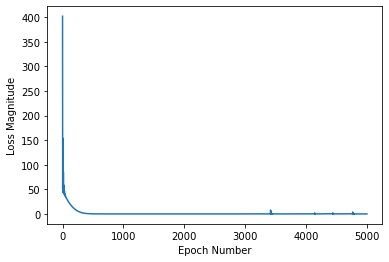

In [114]:
# Define the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[2])
])

# Compile it
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

# Train it
history = model.fit(two_previous_temps, next_temp, epochs=5000, verbose=False)
print("Finished training the model")

# Test it
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

print(model.predict([[21, 23]]))

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model as .tflite.
with open('temp_model01.tflite', 'wb') as f:
    f.write(tflite_model)

# Exporting the weights

You can export the model weights as they are, or you can quantize it to .tflite, and then use [Netron](https://netron.app/) to export the weights. However, note that upon importing the weights from Netron, you need to transform them as for some reason they are flipped. You can do it with numpy's `.T`.

I could not find a more streamlined approach for exporting `.tflite` weights. You can contribute by providing the method.

# Load NPY and export as TXT

At the moment, CircuitPython's ulab does not have a function for reading .npy files, so instead I saved the weights as .txt.

In [116]:
def save_weights(weight, filename):
    np.savetxt(filename, weight, delimiter=',', fmt='%s')

In [117]:
w1 = np.load('w1_temp.npy')
b1 = np.load('b1_temp.npy')

w1 = w1.T
b1 = b1.T

save_weights(w1, 'w1_temp.txt')
save_weights(b1, 'b1_temp.txt')

# Load TXT (practicing for Nano RP2040)

The following sections are redundant and were used to practice importing weights and running manual inference before doing it with CircuitPython on Nano RP2040

In [118]:
with open('w1_temp.txt', 'r') as f:
    a1 = [float(f.readline())]
    a2 = [float(f.readline())]
    w1_loaded = np.array([a1, a2])

In [119]:
with open('b1_temp.txt', 'r') as f:
    a1 = [float(f.readline())]
    b1_loaded = np.array(a1)

# Manual Prediction  (practicing for Nano RP2040)

In [120]:
target_data = [[10, 20]]

# 1st dense layer with Relu activation
prediction=np.dot(target_data, w1_loaded) + b1_loaded
print(prediction)

[[29.99999614]]
